In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
#!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [3]:
df = pd.read_csv("../Data/airline_passengers.csv",
                 index_col = 'Month',
                 parse_dates = True)
df.head()
df.index.freq = 'MS'
df.plot(figsize=(20,8))

In [7]:
# Perform adf test
def adf(data):
    res = adfuller(data)
    print('Test-Statistics:', res[0])
    print('P-Value:', res[1])
    if res[1] < 0.05:
        print("This data is Stationary")
    else:
        print("This data is Nonstationary")
        
adf(df['Passengers'])

Test-Statistics: 0.8153688792060421
P-Value: 0.9918802434376409
This data is Nonstationary


In [8]:
adf(np.random.randn(100))

Test-Statistics: -8.243302836115012
P-Value: 5.640798137699488e-13
This data is Stationary


In [9]:
df['LogPassengers'] = np.log(df['Passengers'])
adf(df['LogPassengers'])

Test-Statistics: -1.7170170891069678
P-Value: 0.4223667747703876
This data is Nonstationary


In [12]:
df['diff'] = df['Passengers'].diff()
adf(df['diff'].dropna())

Test-Statistics: -2.829266824169981
P-Value: 0.05421329028382792
This data is Nonstationary


In [13]:
df['diffLog'] = df['LogPassengers'].diff()
adf(df['diffLog'].dropna())

Test-Statistics: -2.7171305983881355
P-Value: 0.07112054815085829
This data is Nonstationary


<Axes: xlabel='Date'>

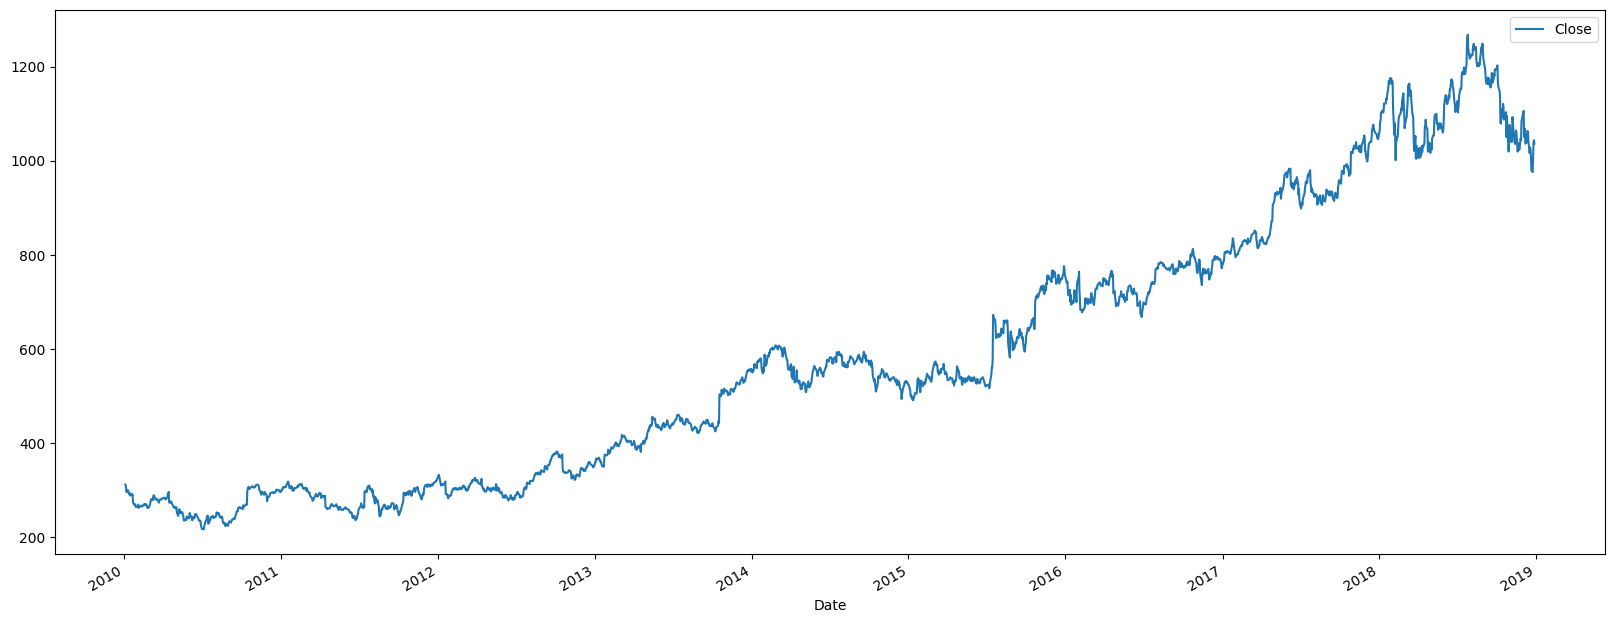

In [14]:
df = pd.read_csv("../Data/sp500sub.csv",
                 index_col = 'Date',
                 parse_dates = True)

goog = df[df['Name'] == 'GOOG'][['Close']].copy()
goog.plot(figsize = (20, 8))

<Axes: xlabel='Date'>

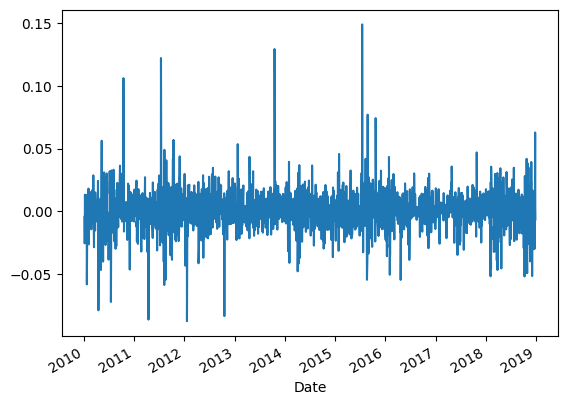

In [16]:
goog['LogPrice'] = np.log(goog['Close'])

goog['LogRet'] = goog['LogPrice'].diff()

goog['LogRet'].plot()

In [19]:
adf(goog['LogPrice'])

Test-Statistics: -0.41819025789061176
P-Value: 0.907017067749841
This data is Nonstationary


In [18]:
adf(goog['LogRet'].dropna())

Test-Statistics: -46.667480227736746
P-Value: 0.0
This data is Stationary
